<a href="https://colab.research.google.com/github/sy-veronica/ML/blob/main/03_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. Polynomial Regression (다항회귀)**

### **공부시간에 따른 시험점수 (우등생)**

In [ ]:
# (1) 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# (2) 데이터셋 불러오기
dataset = pd.read_csv('/content/drive/MyDrive/03. 파이썬 (ML)/02. dataset/PolynomialRegressionData.csv') 
dataset.head()

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6


In [ ]:
# (3) X (독립변수=원인), y (종속변수, 결과) 지정하기
X = dataset.iloc[:, :-1].values  # 처음부터 마지막 컬럼 직전까지의 데이터
y = dataset.iloc[:, -1].values   # 마지막 컬럼 데이터
X, y

In [ ]:
# (4-1) 단순선형회귀 모델 만들기
from sklearn.linear_model import LinearRegression
reg = LinearRegression()  # 단순선형회귀 모델 객체 생성
reg.fit(X, y)             # 단순순선형회귀 모델 학습 (전체데이터 사용)

LinearRegression()

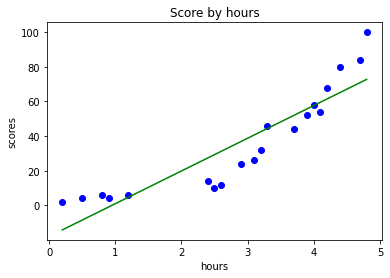

In [ ]:
# (4-2) 단순선형회귀 모델 시각화
plt.scatter(X, y, color='blue')             # 훈련데이터 산포도
plt.plot(X, reg.predict(X), color='green')  # 단순선형회귀 모델 선 그래프
plt.title('Score by hours')  # 그래프 제목
plt.xlabel('hours')          # X축 이름
plt.ylabel('scores')         # y축 이름
plt.show()

In [ ]:
# (4-3) 단순선형회귀 모델 평가
reg.score(X, y)              # 전체데이터로 테스트 및 평가

0.8169296513411765

In [ ]:
# (5) 다항회귀 : X (독립변수=원인), y (종속변수, 결과) 지정하기
# 다항회귀의 경우, sklearn에서 별도의 클래스를 제공해주지 않음
# 따라서, X (독립변수=원인)를 다항식에 맞게 바꿔준 뒤, 선형회귀를 적용하는 방식으로 진행

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)  
X_poly = poly_reg.fit_transform(X)       # X (독립변수=원인) 변환 : [X] → [X^0, X^1, X^2, X^3, X^4]

In [ ]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [ ]:
# (6-1) 다항회귀 모델 만들기
lin_reg = LinearRegression() # 다항회귀 모델 객체 생성
lin_reg.fit(X_poly, y)       # 다항회귀 모델 학습

LinearRegression()

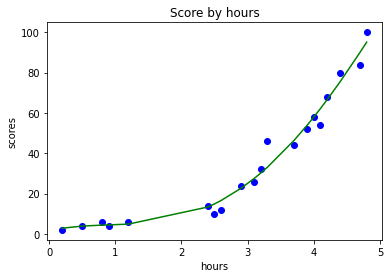

In [ ]:
# (6-2) 다항회귀 모델 시각화
plt.scatter(X, y, color='blue')                                         # 훈련데이터 산포도
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green')  # 다항회귀 모델 선 그래프
plt.title('Score by hours')  # 그래프 제목
plt.xlabel('hours')          # X축 이름
plt.ylabel('scores')         # y축 이름
plt.show()

In [ ]:
# (6-3) X 값을 세분화하여 그래트의 형태를 부드럽게 만들기기
X_range = np.arange(min(X), max(X), 0.1)   # X 최솟값에서 최댓값까지 범위를 0.1단위로 잘라서 데이터 생성
X_range = X_range.reshape(-1, 1)           # row 갯수는 자동계산, column 갯수는 1개

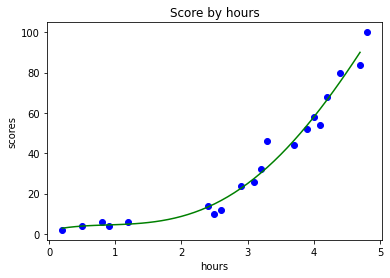

In [ ]:
# (6-4) 다항회귀 모델 시각화 (수정정)
plt.scatter(X, y, color='blue')                                                     # 훈련데이터 산포도
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green')  # 다항회귀 모델 선 그래프
plt.title('Score by hours')  # 그래프 제목
plt.xlabel('hours')          # X축 이름
plt.ylabel('scores')         # y축 이름
plt.show()

### **공부시간에 따른 시험성적 예측**

In [ ]:
# (7-1) 생성한 단순선형회귀 모델을 이용한 결과 예측
reg.predict([[2]])    # 2시간 공부했을 때, 단순선형회귀 모델의 예측값(y_pred)

array([19.85348988])

In [ ]:
# (7-2) 생성한 다항항회귀 모델을 이용한 결과 예측
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간 공부했을 때, 다항회귀 모델의 예측값(y_pred)

array([8.70559135])

In [ ]:
# (8-1) 다항회귀 모델 평가
lin_reg.score(X_poly, y)              # 전체데이터로 테스트 및 평가

0.9782775579000045